# 2.29 Python NumPy Часть 2

In [1]:
# организация программной среды
# загрузка модулей и пользовательские установки
import numpy as np,sympy as sp,pandas as pd,pylab as pl
import random,torch,functools,itertools,requests
from io import StringIO
from sympy import init_printing 
from IPython.display import display,HTML,Latex

In [2]:
def coloring(f):
    @functools.wraps(f)
    def wrapped(*args, **kwargs):
        link = f"""<style>
        @import 'https://fonts.googleapis.com/css?family=Roboto';
        </style>"""
        # случайный оттенок сине-зеленого спектра
        # 0xFFFFFF - любой случайный оттенок
        gb=lambda i:f'{random.randint(0,0x66):02x}'+\
                    f'{random.randint(66,0xFF):02x}'
        col=('color:#33'+gb(i)+';' for i in range(len(args)))
        font='font-size:16px; font-family:Roboto;'
        id=f"{random.randint(0,10**6)}"
        obj=lambda a:f"<p id={id} style='{next(col)} {font}'>{a}</p>"
        return f(*(HTML(link+obj(a)) for a in args),**kwargs)
    return wrapped
# определение функций для строк и массивов
@coloring
def sdisplay(*args, **kwargs):
    return display(*args, **kwargs)
def mdisplay(*arrs):
    for arr in arrs:
        gb=f'{random.randint(0,0x66):02x}{random.randint(66,0xFF):02x}'
        col="\color {#33"+gb+"} "
        if len(arr.shape)==1: arr=[arr]
        display(Latex(col+"{"+sp.latex(sp.Matrix(arr))+"}"))

In [3]:
# генерация случайного оттенка цвета
gb=lambda i:f'{random.randint(0,0x66):02x}'+\
            f'{random.randint(66,0xFF):02x}'
['#33'+gb(i) for i in range(5)]

['#3301f3', '#332f93', '#332c83', '#3331a8', '#333ed1']

## Основные объекты NumPy
- константы
- скалярные величины
- массивы
- типы данных
- ...
### Константы

In [4]:
# бесконечность в положительном направлении
# выдаст предупреждение при делении, но не ошибку
sdisplay([np.inf,-np.inf,np.array([1])/0.])

<ipython-input-4-76a2997a6715>:3: RuntimeWarning: divide by zero encountered in true_divide
  sdisplay([np.inf,-np.inf,np.array([1])/0.])


In [5]:
# значение не определено (аналог None)
# выдаст предупреждение np.log(-1), но не ошибку
sdisplay([np.nan,np.log(-1)])

<ipython-input-5-ad5e157d821e>:3: RuntimeWarning: invalid value encountered in log
  sdisplay([np.nan,np.log(-1)])


In [6]:
# общепринятые константы
sdisplay([np.pi,np.e,np.NZERO,np.PZERO])

In [7]:
# организация нового измерения
a = np.array([1])
sdisplay([a,a.shape],[np.newaxis==None],
         [a[:,np.newaxis],a[:,np.newaxis].shape])

### [Скаляры](https://numpy.org/devdocs/reference/arrays.scalars.html)
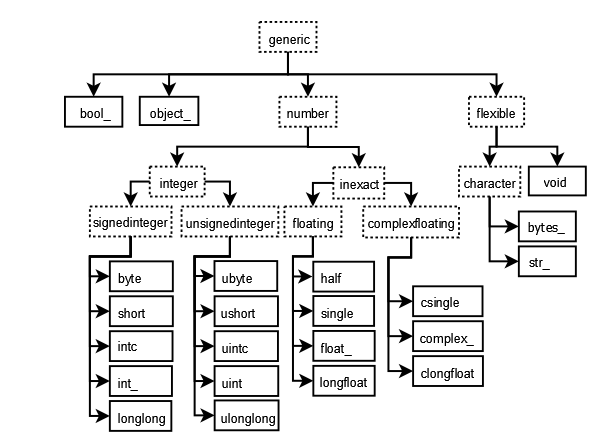

In [8]:
# специфика создания объектов
f16_1,f16_2 = np.float16(".1"),np.float16(".1")
f32_1,f32_2 = np.float32(f16_1),np.float32(".1")
f64_1,f64_2 = np.float64(f32_1),np.float64(".1")
sdisplay([f16_1 == f32_1 == f64_1,f16_2 == f32_2 == f64_2])

In [9]:
# временной тип скаляров
# Unix epoch (00:00:00 UTC, 1 January 1970)
lst = [('2005-02-25',),('2005-02','D'),(1,'Y'),('nat',)]
for el in lst:
    sdisplay([np.datetime64(*el)])

In [10]:
url='https://numpy.org/devdocs/reference/arrays.datetime.html#arrays-datetime'
page = requests.get(url).text
time_types1 = pd.read_html(page)[0]
props = [('min-height','30px'),('min-wigth','15px'),
         ('text-align','center'),('color','darkblue')]
cells = {'selector':'td','props':props}
time_types1.style.set_table_styles([cells])

,Code,Meaning,Time span (relative),Time span (absolute)
0,Y,year,+/- 9.2e18 years,"[9.2e18 BC, 9.2e18 AD]"
1,M,month,+/- 7.6e17 years,"[7.6e17 BC, 7.6e17 AD]"
2,W,week,+/- 1.7e17 years,"[1.7e17 BC, 1.7e17 AD]"
3,D,day,+/- 2.5e16 years,"[2.5e16 BC, 2.5e16 AD]"


In [11]:
time_types2 = pd.read_html(page)[1]
time_types2.style.set_table_styles([cells])

,Code,Meaning,Time span (relative),Time span (absolute)
0,h,hour,+/- 1.0e15 years,"[1.0e15 BC, 1.0e15 AD]"
1,m,minute,+/- 1.7e13 years,"[1.7e13 BC, 1.7e13 AD]"
2,s,second,+/- 2.9e11 years,"[2.9e11 BC, 2.9e11 AD]"
3,ms,millisecond,+/- 2.9e8 years,"[ 2.9e8 BC, 2.9e8 AD]"
4,us / μs,microsecond,+/- 2.9e5 years,"[290301 BC, 294241 AD]"
5,ns,nanosecond,+/- 292 years,"[ 1678 AD, 2262 AD]"
6,ps,picosecond,+/- 106 days,"[ 1969 AD, 1970 AD]"
7,fs,femtosecond,+/- 2.6 hours,"[ 1969 AD, 1970 AD]"
8,as,attosecond,+/- 9.2 seconds,"[ 1969 AD, 1970 AD]"


In [12]:
# разница во времени в секундах
td1 = (np.datetime64("2021-01-01 12:56:23.423")-\
       np.datetime64("2021-01-01"))/np.timedelta64(1,"s")
td2 = np.datetime64("2000-01-01","us")-\
      np.datetime64("0000-01-01","us")
sdisplay([td1],[td2])

In [13]:
# у скаляров - те же атрибуты и методы, что и у ndarray
# строковые методы Python - основа для np.char
x = np.char.capitalize("world")
x.__array_interface__

{'data': (130092128, False),
 'strides': None,
 'descr': [('', '<U5')],
 'typestr': '<U5',
 'shape': (),
 'version': 3}

## Массивы
`ndarray =
блок памяти + схема индексации + описание типа данных`
- исходные данные
- как расположены элементы
- как интерпретировать элемент

In [14]:
# массивы могут иметь общую память
x = np.array(range(10))
y,z = x[1:],x[5:]; x[7] = 100
sdisplay(x,y,z)
x.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [15]:
sdisplay([y],y.base)
y.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

### Подклассы массивов

In [16]:
# массив символов
y = z = np.chararray((3,2),itemsize=5)
y[:] = '  abcdef'
sdisplay([y])
z[:] = 'abc def  '
sdisplay([y],[z])

In [17]:
# массив записей из структурированного массива
sarr = np.zeros(4,dtype=[('name','U9'),('age','i8'),('graduated','bool')])
display(sarr)
sarr['name'] = ['Alice','Chris','Bob','Lisa']
sarr['age'] = [28,27,25,23]
sarr['graduated'] = [True,False,True,False]
display(sarr)
rarr = np.rec.array(sarr)
display(rarr,rarr.name)
rarr is sarr, rarr == sarr

array([('', 0, False), ('', 0, False), ('', 0, False), ('', 0, False)],
      dtype=[('name', '<U9'), ('age', '<i8'), ('graduated', '?')])

array([('Alice', 28,  True), ('Chris', 27, False), ('Bob', 25,  True),
       ('Lisa', 23, False)],
      dtype=[('name', '<U9'), ('age', '<i8'), ('graduated', '?')])

rec.array([('Alice', 28,  True), ('Chris', 27, False), ('Bob', 25,  True),
           ('Lisa', 23, False)],
          dtype=[('name', '<U9'), ('age', '<i8'), ('graduated', '?')])

array(['Alice', 'Chris', 'Bob', 'Lisa'], dtype='<U9')

(False,
 rec.array([ True,  True,  True,  True],
           dtype=bool))

In [18]:
# матрицы не рекомендованы к использованию
# умножение и возведение в степень соответствуют матричным операциям
m = np.matrix(np.arange(12).reshape((3,4)))
n = np.matrix(np.arange(12).reshape((4,3)))
# m.A*n.A не является умножением метриц, не выполнимо
display(m,n.T.A,m*n,m.A*n.T.A)

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

matrix([[ 42,  48,  54],
        [114, 136, 158],
        [186, 224, 262]])

array([[  0,   3,  12,  27],
       [  4,  20,  42,  70],
       [ 16,  45,  80, 121]])

In [19]:
# маскированные массивы
# вычисления для массивов с пропущенными/ошибочными значениями
x = np.array([1,2,3,-99,5])
mx = np.ma.masked_array(x,mask=[0,0,0,1,0])
sdisplay([x],x.mean(),[mx],mx.mean())
# маскированный массив - view, не copy
mx[1] = 100
sdisplay([x],x.mean(),[mx],mx.mean())

In [20]:
# производит вычисления в возможных случаях
log_mx = np.ma.log(np.array([1,2,-1,-2,3,-5]))
mx = np.ma.array([1,-1,3,4,5,6],mask=[0,0,0,0,1,0])
my = np.ma.array([1,2,0,4,5,6],mask=[0,0,0,0,0,1])
sdisplay([log_mx],[np.ma.sqrt(mx/my)])

In [21]:
# разные степени "жесткости" маски
x = np.ma.array([3,2,1],mask=[0,0,1],hard_mask=True)
x[-1] = 10; sdisplay([x])
# смягчаем ограничения
x.soften_mask(); sdisplay([x])
# теперь значение можно заменить на немаскированное
x[-1] = 100; sdisplay([x])
# тот же эффект, если маску убрать
# x.mask = np.ma.nomask; sdisplay([x])
x[-1] = np.ma.masked; sdisplay([x])
# ужесточаем требования
x.harden_mask()
# значение остается маскированным
x[-1] = 1000; sdisplay([x])

## Объекты типизации данных (`descriptor`)
- тип скаляров (целое число, число с плавающей запятой, объект Python и т. д.)
- размер данных (сколько байтов, например, в целом числе)
- порядок байтов данных
  - big-endian `>`
  - little-endian `<`
  - hardware-native, default `=`
- если тип данных является структурированным 
  - имена «полей» структуры
  - тип данных каждого поля
  - какую часть блока памяти занимает каждое поле
- если тип данных является подклассом
    - его форма и тип данных

Система с обратным порядком байтов `big-endian` хранит 
- наиболее значимый байт по наименьшему адресу памяти, 
- а наименее значимый байт - по наибольшему. 

Система с прямым порядком байтов `little-endian`, напротив, хранит 
- младший байт по наименьшему адресу.

In [22]:
# свойства скаляра
dt = np.dtype(np.int32)
dt.type,dt.itemsize,dt.byteorder,dt.char,\
np.issubdtype(np.short,dt),np.issubdtype(np.intc,dt),np.issubdtype(np.int_,dt)

(numpy.int32, 4, '=', 'i', False, True, False)

In [23]:
# базовые численные типы: bool,int,uint,float,complex
# Python-compatible,Python-compatible,Python
np.dtype(int),np.dtype(float),np.dtype(object)


(dtype('int64'), dtype('float64'), dtype('O'))

In [24]:
# примеры построения типа массива
dt01 = np.dtype('i4')   # 32-bit signed integer
dt02 = np.dtype('f8')   # 64-bit floating-point number
dt03 = np.dtype('c16')  # 128-bit complex floating-point number
dt04 = np.dtype('a25')  # 25-length zero-terminated bytes
dt05 = np.dtype('U25')  # 25-character string
dt01,dt02,dt03,dt04,dt05

(dtype('int32'),
 dtype('float64'),
 dtype('complex128'),
 dtype('S25'),
 dtype('<U25'))

In [25]:
# объект с разными типами данных
dt = np.dtype("i4, (2,3)f8, (1,2)S10")
display(dt)
# заполним нулями один элемент массива с указанной структурой
display(np.zeros(1,dtype=dt))
# или логическим значением
np.array([True],dtype=dt)

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', 'S10', (1, 2))])

array([(0, [[0., 0., 0.], [0., 0., 0.]], [[b'', b'']])],
      dtype=[('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', 'S10', (1, 2))])

array([(1, [[1., 1., 1.], [1., 1., 1.]], [[b'True', b'True']])],
      dtype=[('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', 'S10', (1, 2))])

### Основные принципы переопределения
- получится более массивный ("старший") тип
    - в смешанных манипуляциях 
    - результат метода выходит за границы данного типа
- не меняет типа
    - присваивание значения элементам
    - округление
    - ...
- фиксация определенного типа
    - указание при объявлении переменной
    - специальные методы изменения
    - ...

In [26]:
dt1,dt2 = np.dtype('int16'),np.dtype('float32')
a_int = np.array(range(5),dtype=dt1)
a_float = np.array(range(5),dtype=dt2)
# изменение типа при вычислениях
sdisplay([a_int],[(a_int/2).dtype,(a_int+.2).dtype,
                  (a_float+1j).dtype,np.sqrt(a_int).dtype])
# сохранение типа при вычислениях
sdisplay([a_float],[(a_int+2).dtype,np.round(a_float).dtype,
                    (a_float+2).dtype,np.sqrt(a_float).dtype])

In [27]:
# остается прежнего типа
a_int[0] = 10.5
sdisplay([a_int])

In [28]:
# переопределение типа
a_float.astype('int16').dtype

dtype('int16')

In [29]:
# при массивных вычислениях разница во времени существенная
af64 = np.zeros((int(1e7),), dtype=np.float64)
af32 = np.zeros((int(1e7),), dtype=np.float32)
af16 = np.zeros((int(1e7),), dtype=np.float16)

In [30]:
%timeit af64*af64

22.6 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit af32*af32

10.6 ms ± 87.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit af16*af16

185 ms ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
# некорректность ответов из-за превышения возможностей типа
# верно и неверно
np.power(100,8,dtype=np.int64),np.power(100,8,dtype=np.int32)

(10000000000000000, 1874919424)

## Манипуляции с формой объектов

In [34]:
# последнее измерение "распутывается" первым
# транспонирование и развертывание превращает art в самостоятельный объект
a = np.array([[1,2,3],[4,5,6]])
ar,art = a.ravel(),a.T.ravel()
a[0,2]=10; ar[0]=100; art[-1]=1000
sdisplay([a,ar,ar.base])
sdisplay([a.T,art,art.base])

In [35]:
# преобразование формы объекта
# транспонирование и реформирование не превращает art в самостоятельный объект
a = np.array([[1,2,3],[4,5,6]])
ar,art = a.reshape(6,1),a.T.reshape(6,1)
a[0,2]=10; ar[0]=100; art[-1]=100
sdisplay([a,ar,ar.base])
sdisplay([a.T,art,art.base])

In [36]:
# разные варианты транспонирования
a = np.arange(4*3*2).reshape(4,3,2)
at1 = a.transpose()
at2 = a.transpose(1,2,0)
print(a.shape,at1.shape,at2.shape)
mdisplay(a[0,:,:],at1[:,:,0],at2[:,:,0])

(4, 3, 2) (2, 3, 4) (3, 2, 4)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [37]:
# возможно изменение количества элементов
a = np.arange(10); sdisplay(a)
a.resize((4,)); sdisplay(a)
a = np.arange(10); sdisplay(a)
a.resize((20,)); sdisplay(a)
b = a; b[-1] = 100; sdisplay(a)
# a.resize(10) выдаст ошибку, массив связан с другим объектом

In [38]:
# на количество элементов влияет тип данных
x = np.arange(8,dtype='uint8'); sdisplay(x)
# изменение типа данных самого объекта
x.dtype='<i2'; sdisplay(x,[0x0100,0x0302,0x0504,0x0706])
# создание представления c другим типом данных
xv = x.view('<i4'); sdisplay(xv,[0x03020100,0x07060504])

## Принципы и схемы индексирования
- `strides` сколько байт нужно пройти до следующего элемента

In [66]:
x8 = np.array(range(1,31),dtype=np.int8).reshape(2,3,5)
# C & Fortran order
x16C = np.array(x8,dtype=np.int16)
x16F = np.array(x16C,order='F')
sdisplay([x8.shape, x16C.shape, x16F.shape, 
          x8.strides, x16C.strides,x16F.strides])

In [73]:
print(x8.tobytes('A'),x16C.tobytes('A')[:30],x16F.tobytes('A')[:30],sep='\n')

b'\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x0c\r\x0e\x0f\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e'
b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00'
b'\x01\x00\x10\x00\x06\x00\x15\x00\x0b\x00\x1a\x00\x02\x00\x11\x00\x07\x00\x16\x00\x0c\x00\x1b\x00\x03\x00\x12\x00\x08\x00'


In [68]:
# (15,5,1), int8 - 1 bytes/number
byte_offset8 = (15*1 + 5*2 + 1*1)//1   # найдем x8[1,2,1]
sdisplay([x8.flat[byte_offset8],x8[1,2,1]])
# (30,10,2), int16 - 2 bytes/number
byte_offset16C = (30*1 + 10*2 + 2*3)//2   # найдем x16C[1,2,3]
sdisplay([x16C.flat[byte_offset16C],x16C[1,2,3]])

In [75]:
# способ построения массива 
x = np.ones((int(1e5),))
xs = np.ones((int(1e5)*100,))[::100]
sdisplay([x.shape, xs.shape, x.strides, xs.strides])
%timeit x.sum()
%timeit xs.sum()

34.5 µs ± 877 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
268 µs ± 9.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
x8 = np.array(range(1,31),dtype=np.int8).reshape(2,3,5)
sdisplay(x8,x8[::2,::3,::-1],x8.T)
x8.strides,x8[::2,::3,::-1].strides,x8.T.strides

((15, 5, 1), (30, 15, -1), (1, 5, 15))